https://uclaacmai.github.io/Linear-Regression/

https://anujdutt9.github.io/LinearRegressionTF.html

In [0]:
from sklearn.datasets import load_boston
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
boston_dataset = load_boston()

In [2]:
# Seperate Data into Features and Labels and load them as a Pandas Dataframe
# Features
features_df = pd.DataFrame(np.array(boston_dataset.data), columns=[boston_dataset.feature_names])
features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# Labels
labels_df = pd.DataFrame(np.array(boston_dataset.target), columns=['labels'])
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [0]:
from sklearn.model_selection import train_test_split
# Train Test Split
# Training Data = 80% of Dataset
# Test Data = 20% of Dataset
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=101)

In [5]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20


In [6]:
print("X_test.shape : {} \ny_test.shape : {} ".format(X_test.shape,y_test.shape))
print("X_train.shape : {} \ny_train.shape : {} ".format(X_train.shape,y_train.shape))

X_test.shape : (102, 13) 
y_test.shape : (102, 1) 
X_train.shape : (404, 13) 
y_train.shape : (404, 1) 


In [0]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X_train)
# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
# Converting from Pandas Dataframe to Numpy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
# Get the Type of Training Data
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [9]:
# Apply same Normalization for Test Features
scal = StandardScaler()
scal.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Make X_test to be the Scaled Version of Data
# This process scales all the values in all columns and replaces them with the new values
X_test = pd.DataFrame(data=scal.transform(X_test), columns=X_test.columns, index=X_test.index)

In [0]:
# Convert test features and Labels to Numpy Arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
# Get the Type of Test Data
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [13]:
X_train[0]

array([-0.41461886,  1.84447483, -0.85460156, -0.26761547, -1.29472643,
        0.06030019, -0.79942184,  1.67450627, -0.40353434, -0.67306582,
       -0.85336216,  0.43392324, -0.7360645 ])

Text(0.5, 1.0, 'Number of rooms vs House Price')

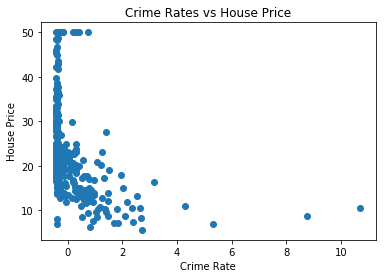

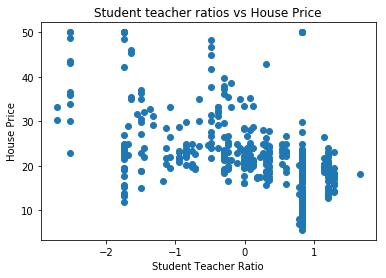

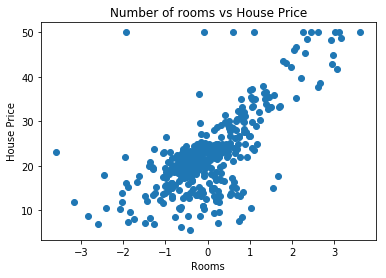

In [14]:
# get the crime rates and prices
crime_rates, prices = [X_train[i][0] for i in range(X_train.shape[0])], y_train.tolist()
# student-teacher ratio is the 10th feature
student_teacher_ratios = [X_train[i][10] for i in range(X_train.shape[0])]
# number of roots is the 5th feature
rooms = [X_train[i][5] for i in range(X_train.shape[0])]

plt.scatter(crime_rates, prices)
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.title('Crime Rates vs House Price')
plt.figure()
plt.scatter(student_teacher_ratios, prices)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('House Price')
plt.title('Student teacher ratios vs House Price')
plt.figure()
plt.scatter(rooms, prices)
plt.xlabel('Rooms')
plt.ylabel('House Price')
plt.title('Number of rooms vs House Price')

In [0]:
# TODO: create placeholders for X and y, our features and tagets, respectively.
X = tf.placeholder(tf.float32, shape = [None, 13])
y = tf.placeholder(tf.float32, shape = [None,1])

# TODO: create variables for W and b, and initialize them with constants.
W = tf.Variable(tf.constant(np.random.randn(), shape = [13,1 ]))
b = tf.Variable(tf.constant(np.random.randn()))

In [0]:
# TODO: use Tensorflow to write out the linear regression model and assign it to a variable y_pred.
# y_pred = ...
y_pred = tf.add(tf.matmul(X, W) , b) 
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.AdamOptimizer(learning_rate = .05).minimize(loss)

In [17]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
initial_loss = loss.eval(feed_dict = {X: X_train, y: y_train})
print("initial loss: {}".format(initial_loss))
for i in range(10000):
    # TODO: run the optimization step with the training data passed in.
    sess.run(opt, feed_dict = {X: X_train, y: y_train})
    if i % 1000 == 0:
        # TODO: print the current error of the model so we can know how the model is doing while it is training
        print("current loss: {}".format(loss.eval(feed_dict = {X: X_train, y: y_train})))

# TODO: evalute and print the final loss on the training and testing datasets.

initial loss: 561.8048095703125
current loss: 554.7138671875
current loss: 19.269495010375977
current loss: 19.198217391967773
current loss: 19.198217391967773
current loss: 19.198217391967773
current loss: 19.19822120666504
current loss: 19.198217391967773
current loss: 19.198217391967773
current loss: 19.198217391967773
current loss: 19.19866371154785


In [18]:
data, targets = X_test, y_test
predictions = sess.run(y_pred, feed_dict = {X: data})
predictions = predictions.flatten()
targets = targets.reshape((102))

# lets take a look at some predictions
for i in range(10):
    randint = np.random.randint(0, 102)
    pred = predictions[randint]
    actual = targets[randint]
    print("prediction: {}, actual was: {}".format(pred, actual))

prediction: 11.337103843688965, actual was: 5.0
prediction: 24.200345993041992, actual was: 23.1
prediction: 31.685062408447266, actual was: 31.7
prediction: 18.25719451904297, actual was: 14.5
prediction: 31.415027618408203, actual was: 36.1
prediction: 18.621360778808594, actual was: 18.2
prediction: 6.321949005126953, actual was: 14.4
prediction: 34.03034591674805, actual was: 50.0
prediction: 14.738409042358398, actual was: 11.3
prediction: 35.09452819824219, actual was: 50.0


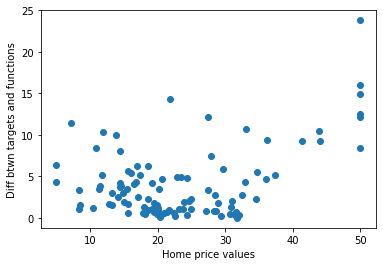

average absolute difference: 4134.807738135843
average house price: 23308.823529411766


In [19]:
diffs = abs(targets - predictions)
avg_diffs = np.mean(diffs)
avg_houseprice = np.mean(targets)
plt.xlabel('Home price values')
plt.ylabel('Diff btwn targets and functions')
plt.scatter(targets, diffs)
plt.show()
print("average absolute difference: {}".format(avg_diffs * 1000))
print("average house price: {}".format(avg_houseprice * 1000))